<h1>2장 NumPy 소개</h1>

<h2>집계: 최소값, 최대값, 그리고 그 사이의 모든 것</h2>

<b>배열의 값의 합 구하기</b>

In [4]:
import numpy as np
L = np.random.random(100)
sum(L)

52.05140286183495

In [5]:
np.sum(L)

52.05140286183496

In [6]:
big_array = np.random.rand(100)
%timeit sum(big_array)
%timeit np.sum(big_array) 

8.39 µs ± 54.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.23 µs ± 27.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


<b>최소값과 최대값</b>

In [7]:
min(big_array), max(big_array)

(0.008108956399923928, 0.9885930990134385)

In [8]:
np.min(big_array), np.max(big_array)

(0.008108956399923928, 0.9885930990134385)

In [9]:
%timeit min(big_array)
%timeit np.min(big_array)

6.85 µs ± 90.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.2 µs ± 63.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [10]:
print(big_array.min(), big_array.max(), big_array.sum()) 

0.008108956399923928 0.9885930990134385 53.14837419324378


NumPy 배열을 다룰 때는 가능한 NumPy 버전의 집계 함수를 사용한다.

<b>다차원 집계</b>

In [15]:
M = np.random.random([3,4])
print(M)

[[0.31460604 0.06384497 0.57592773 0.61433615]
 [0.45565209 0.99302262 0.69674423 0.50434384]
 [0.70187959 0.0748859  0.42758655 0.68730535]]


In [12]:
M.sum()

6.458796254549803

In [13]:
M.min(axis=0)

array([0.2286629 , 0.23936363, 0.3416399 , 0.19660588])

In [14]:
M.min(axis=1)

array([0.19660588, 0.40690247, 0.23936363])

<b>기타 집계 함수</br>

<p>표2-3</p>
<table style="width:100%">
  <tr>
    <th>함수명</th>
    <th>Nan 안전모드</th> 
    <th>설명</th>
  </tr>
  <tr>
    <td>np.sum</td>
    <td>np.nansum</td> 
    <td>요소의 합 계산</td>
  </tr>
  <tr>
    <td>np.prod</td>
    <td>np.nanprod</td> 
    <td>요소의 곱 계산</td>
  </tr>
  <tr>
    <td>np.mean</td>
    <td>np.nanmean</td> 
    <td>요소의 평균 계산</td>
  </tr>
  <tr>
    <td>np.std</td>
    <td>np.nanstd</td> 
    <td>표준 편차 계산</td>
  </tr>
  <tr>
    <td>np.var</td>
    <td>np.nanvar</td> 
    <td>분산 계산</td>
  </tr>
  <tr>
    <td>np.min</td>
    <td>np.nanmin</td> 
    <td>최소값 찾기</td>
  </tr>
  <tr>
    <td>np.max</td>
    <td>np.nanmax</td> 
    <td>최대값 찾기</td>
  </tr>
  <tr>
    <td>np.argmin</td>
    <td>np.nanargmin</td> 
    <td>최소값의 인덱스 찾기</td>
  </tr>
  <tr>
    <td>np.argmax</td>
    <td>np.nanargmax</td> 
    <td>최대값의 인덱스 찾기</td>
  </tr>
  <tr>
    <td>np.median</td>
    <td>np.nanmedian</td> 
    <td>요소의 중앙값 찾기</td>
  </tr>
  <tr>
    <td>np.percentile</td>
    <td>np.nanpercentile</td> 
    <td>요소의 순위 기반 백분위 수 계산</td>
  </tr>
  <tr>
    <td>np.any</td>
    <td>N/A</td> 
    <td>요소 중 참이 있는지 검사</td>
  </tr>
  <tr>
    <td>np.all</td>
    <td>N/A</td> 
    <td>모든 요소가 참인지 검사</td>
  </tr>
</table>

<b>예제: 미국 대통령의 평균 신장은 얼마일까?</b>

In [16]:
!head -4 /Users/****/Sites/PythonDataHandbook/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


* https://github.com/jakevdp/PythonDataScienceHandbook/tree/master/notebooks/data

In [22]:
import pandas as pd
data = pd.read_csv('/Users/****/Sites/PythonDataHandbook/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [23]:
print("Mean height:          ", heights.mean())
print("Sttandard height:     ", heights.std())
print("Minimum height:       ", heights.min())
print("Maximun height:       ", heights.max())

Mean height:           179.73809523809524
Sttandard height:      6.931843442745892
Minimum height:        163
Maximun height:        193


In [24]:
print("25th pecentiles :", np.percentile(heights, 25))
print("Median          :", np.median(heights))
print("75th pecentiles :", np.percentile(heights, 75))

25th pecentiles : 174.25
Median          : 182.0
75th pecentiles : 183.0


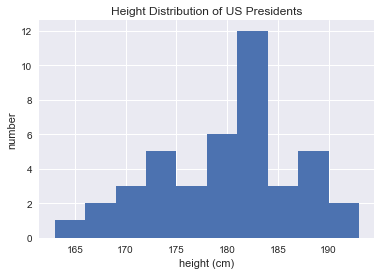

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() #플롯 스타일 설정
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');